<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W3/ungraded_labs/C3_W3_Lab_3_Conv1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Using Convolutional Neural Networks

In this lab, you will look at another way of building your text classification model and this will be with a convolution layer. As you learned in Course 2 of this specialization, convolutions extract features by applying filters to the input. Let's see how you can use that for text data in the next sections.

In [1]:
# Install this package to use Colab's GPU for training
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 25 not upgraded.
Need to get 420 MB of archives.
After this operation, 1,622 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.4.1.50-1+cuda11.6 [420 MB]
Fetched 420 MB in 7s (63.3 MB/s)
(Reading database ... 123942 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
(Reading database ... 123919 files and directories currently installed.)
Prepari

## Download and prepare the dataset

In [2]:
import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features["text"].encoder

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBUXSBQ/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBUXSBQ/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteBUXSBQ/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = (
    dataset["train"],
    dataset["test"],
)

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [4]:
# Take 2 training examples and decode the text feature
for example in test_data.take(2):
    print(f'SENTENCE:\n{tokenizer.decode(example[0])}')
    print(f'SEQ LEN: {len(example[0])}')
    print(f'CLASSIFICATION: {example[1].numpy()}\n\n')

SENTENCE:
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.
SEQ LEN: 283
CLASSIFICATION: 1


SENTENCE:
A black

## Build the Model

In Course 2, you were using 2D convolution layers because you were applying it on images. For temporal data such as text sequences, you will use [Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) instead so the convolution will happen over a single dimension. You will also append a pooling layer to reduce the output of the convolution layer. For this lab, you will use [GlobalMaxPooling1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool1D) to get the max value across the time dimension. You can also use average pooling and you will do that in the next labs. See how these layers behave as standalone layers in the cell below.

In [5]:
import tensorflow as tf
import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

print(f"batch_size: {batch_size}")
print(f"timesteps (sequence length): {timesteps}")
print(f"features (embedding size): {features}")
print(f"filters: {filters}")
print(f"kernel_size: {kernel_size}")

# Define array input with random values
random_input = np.random.rand(batch_size, timesteps, features)
print(f"shape of input array: {random_input.shape}")

# Pass array to convolution layer and inspect output shape
conv1d = tf.keras.layers.Conv1D(
    filters=filters, kernel_size=kernel_size, activation="relu"
)
result = conv1d(random_input)
print(f"shape of conv1d output: {result.shape}")

# Pass array to max pooling layer and inspect output shape
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f"shape of global max pooling output: {result.shape}")

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5
shape of input array: (1, 20, 20)
shape of conv1d output: (1, 16, 128)
shape of global max pooling output: (1, 128)


You can build the model by simply appending the convolution and pooling layer after the embedding layer as shown below.

In [7]:
import tensorflow as tf

# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5  # words are grouped by the size of the filter
dense_dim = 64

# Build the model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim),
        tf.keras.layers.Conv1D( # group words 5 at a time
            filters=filters, kernel_size=kernel_size, activation="relu"
        ),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(dense_dim, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 conv1d_2 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
________________________________________________

In [8]:
# Set the training parameters
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

## Train the model

Training will take around 30 seconds per epoch and you will notice that it reaches higher accuracies than the previous models you've built.

In [9]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 40s 395ms/step - loss: 0.6027 - accuracy: 0.6793 - val_loss: 0.3917 - val_accuracy: 0.8308
Epoch 2/10
98/98 [==============================] - 18s 176ms/step - loss: 0.2799 - accuracy: 0.8846 - val_loss: 0.2702 - val_accuracy: 0.8876
Epoch 3/10
98/98 [==============================] - 13s 133ms/step - loss: 0.1451 - accuracy: 0.9503 - val_loss: 0.2624 - val_accuracy: 0.8942
Epoch 4/10
98/98 [==============================] - 12s 126ms/step - loss: 0.0617 - accuracy: 0.9874 - val_loss: 0.2875 - val_accuracy: 0.8926
Epoch 5/10
98/98 [==============================] - 12s 125ms/step - loss: 0.0203 - accuracy: 0.9983 - val_loss: 0.3101 - val_accuracy: 0.8940
Epoch 6/10
98/98 [==============================] - 12s 117ms/step - loss: 0.0069 - accuracy: 0.9998 - val_loss: 0.3383 - val_accuracy: 0.8942
Epoch 7/10
98/98 [==============================] - 11s 109ms/step - loss: 0.0038 - accuracy: 0.9999 - val_loss: 0.3571 - val_accuracy: 0.8938

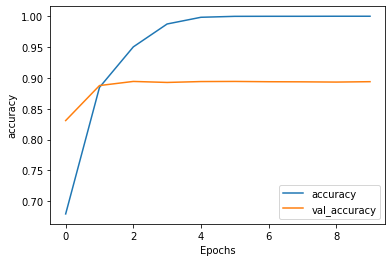

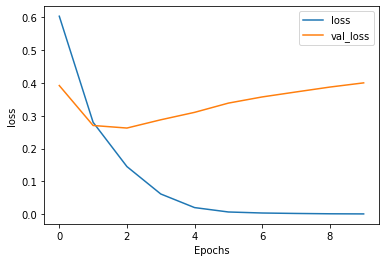

In [10]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()


# Plot the accuracy and results
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Wrap Up

In this lab, you explored another model architecture you can use for text classification. In the next lessons, you will revisit full word encoding of the IMDB reviews and compare which model works best when the data is prepared that way.